In [1]:
# https://github.com/WegraLee/deep-learning-from-scratch

In [2]:
!pip install pickle5

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pickle5
Failed to build pickle5


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [83 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-313\pickle5
      copying pickle5\pickle.py -> build\lib.win-amd64-cpython-313\pickle5
      copying pickle5\pickletools.py -> build\lib.win-amd64-cpython-313\pickle5
      copying pickle5\__init__.py -> build\lib.win-amd64-cpython-313\pickle5
      creating build\lib.win-amd64-cpython-313\pickle5\test
      copying pickle5\test\pickletester.py -> build\lib.win-amd64-cpython-313\pickle5\test
      copying pickle5\test\test_pickle.py -> build\lib.win-amd64-cpython-313\pickle5\test
      copying pickle5\test\test_picklebuffer.py -> build\lib.win-amd64-cpython-313\pickle5\test
      copying pickle5\test\__init__.py -> build\lib.win-amd64-cpython-313\pickle5\test
      running build_ext
      building 'pickle5._pickle' extension
      crea

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import pickle

In [5]:
x = np.array([-1.0, 1.0, 2.0])
y = x > 0 
y

array([False,  True,  True])

In [6]:
y = y.astype(np.int64) # bool 타입 요소들을 인트로 변환 해주는 astype(np.int) 함수

In [7]:
y

array([0, 1, 1])

In [8]:
def step_function(x):
  return np.array(x>0, dtype=np.int64)

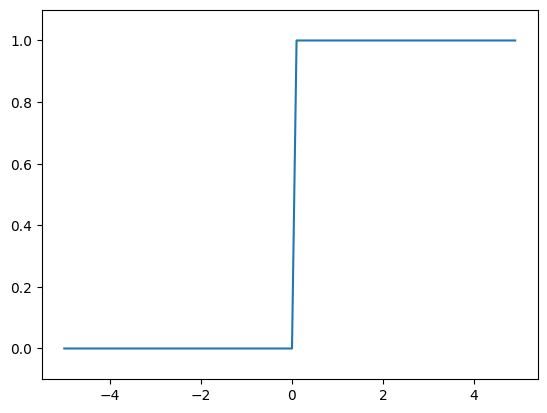

In [9]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()

In [10]:
def sigmoid(x):
  return 1 /(1+np.exp(-x))
 # 넘파이 배열에, exp(-x)를 적용

In [11]:
x= np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

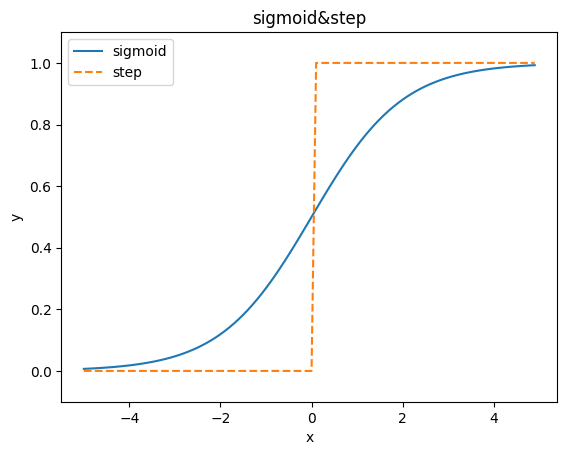

In [12]:
x = np.arange(-5.0, 5.0,0.1)
y1 = sigmoid(x)
y2 = step_function(x)


plt.ylim(-0.1, 1.1)
plt.plot(x,y1, label = 'sigmoid')
plt.plot(x,y2, linestyle = '--',label='step')
plt.xlabel('x') #x축 이름
plt.ylabel('y') #y축 이름
plt.title('sigmoid&step') # 제목
plt.legend() # label 그래프내에 출력
plt.show()

In [13]:
# 위 그래프와 같이 계단 함수는 0과 1 두가지만 신경망으로 전달하지만
# 시그모이드 함수는 연속적인 값을 출력해서 보내준다.

In [14]:
# 계단함수- 시그모이드의 공통점 : 비선형 함수
# 선형함수로는 신경망을 사용하는(깊게하는) 의미가 없다.
# 이것은 선형함수는 결국 은닉층을 여러개 만들어도
# 결국 하나의 선형함수로 표현이 가능
# 은닉층을 쌓을 필요가 없는 것
# 층을 쌓는 혜택을 얻고 싶다면 비선형을 쓰자!

In [15]:
"""==================3.2.7 ReLU 함수=============
 - 시그모이드 함수 대신에 최근에 활성화함수로 많이씀.
 - 입력이 0을 넘으면 그 입력을 그대로 출력하고,
     0이하이면 0을 출력
"""

'==================3.2.7 ReLU 함수=============\n - 시그모이드 함수 대신에 최근에 활성화함수로 많이씀.\n - 입력이 0을 넘으면 그 입력을 그대로 출력하고,\n     0이하이면 0을 출력\n'

In [16]:
def relu(x):
  return np.maximum(0,x)
  # np.maximum(a,b) : a와 b 둘중 큰값을 선택해 
  # 반환해주는함수

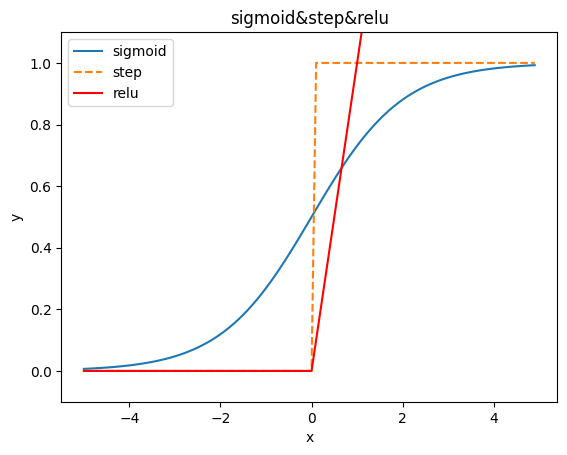

In [17]:
x = np.arange(-5.0, 5.0,0.1)
y1 = sigmoid(x)
y2 = step_function(x)
y3 = relu(x)

plt.ylim(-0.1, 1.1)
plt.plot(x,y1, label = 'sigmoid')
plt.plot(x,y2, linestyle = '--',label='step')
plt.plot(x,y3,color = 'red', label = 'relu')
plt.xlabel('x') #x축 이름
plt.ylabel('y') #y축 이름
plt.title('sigmoid&step&relu') # 제목
plt.legend() # label 그래프내에 출력
plt.show()

In [18]:
#=========3.3 다차원 배열의 계산================

In [19]:
# np 복습
import numpy as np
A = np.array([1,2,3,4,])
B = np.array([[1,2], [3,4], [5,6]])




In [20]:
np.ndim(A) # 배열의 차원 반환

1

In [21]:
np.ndim(B) # 배열의 차원 반환

2

In [22]:
# .shape : 배열의 행, 열, 높이를 튜플로 가지고 있는 객체변수
print(A.shape)
print(type(A.shape))
print(A.shape[0])
print(type(A.shape[0]))

print(B.shape)
print(type(B.shape))
print(type(B.shape[0]))
print(B.shape[0])


(4,)
<class 'tuple'>
4
<class 'int'>
(3, 2)
<class 'tuple'>
<class 'int'>
3


In [23]:
# 3.3.1 다차원 배열 
# np.dot(a,b) : 행렬 곱 연산
  # - 입력이 1차원 이면 백터를 , 2차원이면 행렬곱을 계산합니ㅏㄷ. 
  # np.dot(a,b)와 np.dot(b,a)는 다를 수 있다.

In [24]:
A = np.array([[1,2,3,], [4,5,6]])
A.shape

(2, 3)

In [25]:
B = np.array([[1,2,], [3,4,], [5,6]])
B.shape

(3, 2)

In [26]:
C = np.array([[1,2,], [3,4]])

In [27]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

In [28]:
np.dot(B,A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

In [29]:
#np.dot(A,C) # 에러 뜸
np.dot(C,A)

array([[ 9, 12, 15],
       [19, 26, 33]])

In [30]:
A = np.array([[1,2,], [3,4],[5,6]])
B = np.array([7,8])
np.dot(A,B)

array([23, 53, 83])

In [31]:
X = np.array([1,2])
W = np.array([[1,3,5],[2,4,6]])

In [32]:
np.dot(X,W)

array([ 5, 11, 17])

In [33]:
# ================== 3층 신경망 구현하기===================

In [34]:
X =np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X,W1)+B1

In [35]:
A1  # 각 가중치를 더한 값을 저장 a1, a2, a3

array([0.3, 0.7, 1.1])

In [36]:
Z1 = sigmoid(A1) # 각 가중치를 활성화 함수 sigmoid()로 적용
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [37]:
# 1층에서 2층으로 가는 가중치 작성
W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
B2 = np.array([0.1,0.2])

A2 = np.dot(Z1, W2) + B2

In [38]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [39]:
def identity_function(x):  # 출력층의 활성화 함수는 시그마 기호를 쓴다. 은닉층은 h
  return X

W3 = np.array([[0.1,0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3)+B3
Y = identity_function(A3)

In [40]:
Y

array([1. , 0.5])

In [41]:
# 신경망은 분류회귀 모두에 이용할 수 있다.
# 회귀에선 출력층의 활성화 함수를 일반적으로 항등함수를,
# 분류에선 출력층의 활성화 함수를 일반적으로 소프트맥스 함수를 쓴다.

In [42]:
#=============3.5.1 항등함수와 소프트맥스 함수 구현하기================

In [43]:
# 소프트맥스 함수구현
# 소프트맥스 함수의 구현의 주의점은 4바이트나 8바이트로 수를 저장하는
# 컴퓨터에서 오버플로우가 발생할 수 있다.
# 입력신호중 최댓값 C를 통해서 max값을 막을 수 있다.
a = np.array([0.3,2.9,4.0])

In [44]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [45]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [46]:
y = exp_a/sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [47]:
def softmax(a):

  c = np.max(a) #  exp함수의 오버플로우를 막는 배열의 최댓값.
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a
  return y


In [48]:
a = np.array([1010,1000,990])
n = softmax(a)
n

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [49]:
#소프트맥스 함수의 특징
# 함수의 출력은 0과 1사이의 값
# 출력의 총합은 1, 함수의 출력을 '확률'로 해석할 수 있다.
# 소프트맥스 함수는 단조증가함수이므로, 출력의 결과들의 대소가 입력원소들에서 변하지 않는다.

"""일반적으로 신경망을 이용한 분류는 가장 큰 신호를 나타내는 하나의 
클래스로만 인식하기에 굳이 소프트맥스함수를 쓰지 않고 생략하는 경우도 많다.
지수함수계산비용을 절약하고자함."""

a= np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
# 1.8%의 확률로 0번째 클래스다.
# 24.5%의 확률로 1번째 클래스다.
# 73.6% 의 확률로 2번째 클래스다.

[0.01821127 0.24519181 0.73659691]


In [50]:
print(np.sum(y))

1.0


In [51]:
#============3.5.4 출력층의 뉴런수 정하기====================

In [52]:
#============3.6 손글씨 숫자 인식==========
''' 학습과정에서 가중치 매개변수를 학습, 추론과정에서 학습한 매개변수를 사용하여 
 분류, 추론과정을 신경망의 순전파라고도 한다. '''

' 학습과정에서 가중치 매개변수를 학습, 추론과정에서 학습한 매개변수를 사용하여 \n 분류, 추론과정을 신경망의 순전파라고도 한다. '

In [53]:
#=================3.6.1 MNIST 데이터셋============

In [82]:
import sys, os
sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) =\
load_mnist(flatten = True, normalize=False)
# flatten = True : 1차원 numpy 배열로 저장하겠단뜻.
# reshape()메소드로  원한느 형상을 인수로 지정해서 넘파이 배열의 형상을 바꿀 수 있음.
'''numpy로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야하며
이것을 Image.fromarray() 가 수행함.'''

print(x_train.shape)
#print(type(x_train)) ndarray타입
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

def img_show(img):
  pil_img =Image.fromarray(np.uint8(img))
  pil_img.show()

img = x_train[0]
label=t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)


(60000, 784)
(60000,)
(10000, 784)
(10000,)
5
(784,)
(28, 28)


In [ ]:
# =============3.6.2 신경망의 추론 처리===============
'''
추론을 수행하는 신경망 구축
  입력층 뉴런 : 784(이미지 크기가 28x28 이기 때문.)
  출력층 뉴런 : 10개 (0~9까지)
  은닉층 : 2개 = 첫번째 50개 뉴런, 두번째 100개 뉴런
        (임의로 정한값.)
'''


'\n추론을 수행하는 신경망 구축\n  입력층 뉴런 : 784(이미지 크기가 28x28 이기 때문.)\n  출력층 뉴런 : 10개 (0~9까지)\n  은닉층 : 2개 = 첫번째 50개 뉴런, 두번째 100개 뉴런\n        (임의로 정한값.)\n'

In [76]:
import os.path
import gzip
import pickle
import os, sys
from dataset.mnist import load_mnist
from PIL import Image
import numpy as np

In [ ]:
# =============3.6.2 신경망의 배치 처리==============

In [92]:



def get_data():
  (x_train, y_train),(x_test, t_test)=\
      load_mnist(normalize =True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network(): 
  # pickle 파일 sample_weight.pkl에 저장된 '학습 가중치매개변수'를 읽는다.
  # 가중치와 편향매개변수가 딕셔너리 변수로 저장되어있다.
  with open('sample_weight.pkl','rb') as f:
    network = pickle.load(f)

    return network
  

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1,b2,b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1)+b1
  z1 = sigmoid(a1)
  a2=np.dot(z1, W2) +b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3)+b3
  y = softmax(a3)

  return y

In [95]:
x, t = get_data()

network=init_network()

accuracy_cnt = 0

for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 엍는다.
  if p ==t[i]:
    accuracy_cnt +=1

print("Accuracy : " + str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352


Current working directory: c:\Users\TFX5450H\Desktop\ch03
File exists: True


In [ ]:
x, y = get_data()
network = init_network()

batch_size = 100 # 배치의 크기
accuracy_cnt =0 

for i in range(0,len(x), batch_size):
  x_batch= x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])



0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
